In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [68]:
train=pd.read_csv("../data/train.csv",low_memory=False,parse_dates=[3],index_col=0)
print(train.shape)
train.head()

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [5]:
test=pd.read_csv("../data/test.csv",parse_dates=[4],index_col=0)
print(test.shape)
test.head()

(41088, 17)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [6]:
test.dtypes

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                float64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [7]:
store=pd.read_csv("../data/store.csv")
print(store.shape)
store.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
ss = pd.read_csv("../data/sample_submission.csv")
print(ss.shape)
ss.head()

(41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
# plot missing values percentage
def missing_perc(df):
    # Check the percentage of missing values in every column
    ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 7))
    plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

    for p in ax.patches:
        percentage ='{:,.2f}%'.format((p.get_width()/df.shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))

In [10]:
train.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
test.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [12]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
# train_df=train.merge(store,how='left',on='Store')
train_df=train.copy()
test_df=test.copy()

In [14]:
# test_df=test.merge(store,how='left',on='Store')

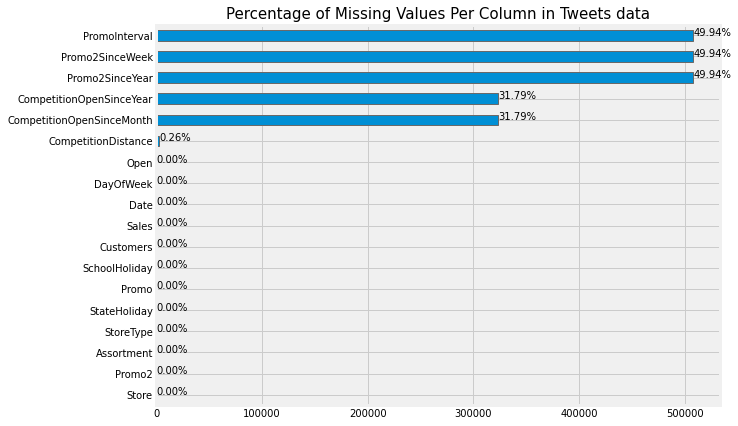

In [15]:
missing_perc(train_df)

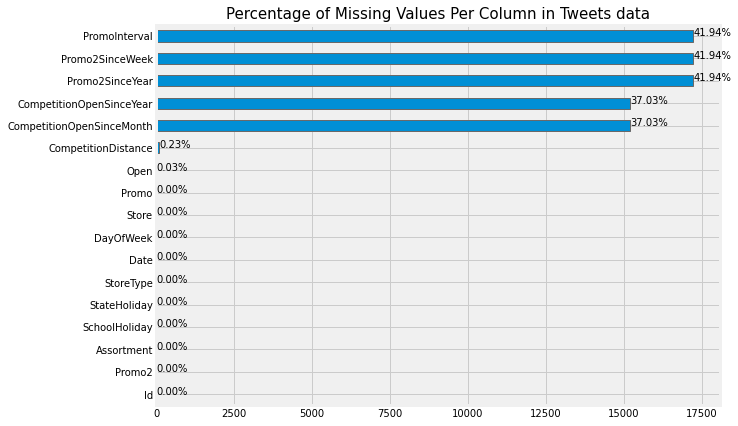

In [16]:
missing_perc(test_df)

In [17]:
# Replace the holidays value the actual name

In [18]:
train_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)
test_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)

In [19]:
cat_cols=['StateHoliday','StoreType','Assortment','PromoInterval']

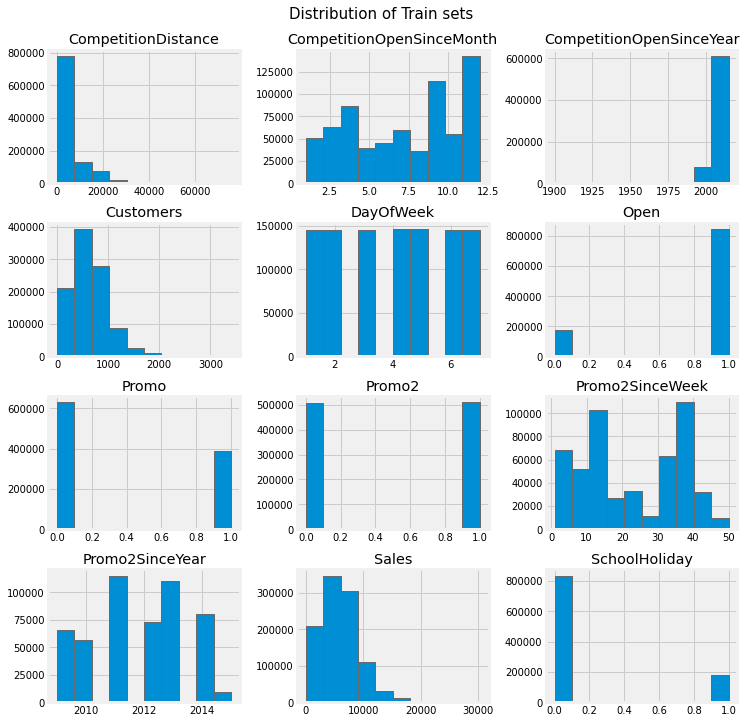

In [20]:
_=train_df[list(train_df.columns.difference(['Store']))].hist(figsize=(11,12))
_=plt.suptitle('Distribution of Train sets',y=0.93,size=15)

In [21]:
def count_cat(df, cat_cols, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axe = axs.ravel()
    for i, col in enumerate(cat_cols):
        sns.countplot(x=col, data=train_df, ax=axe[i])

    _ = plt.suptitle(title)

In [22]:
cat_cols

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

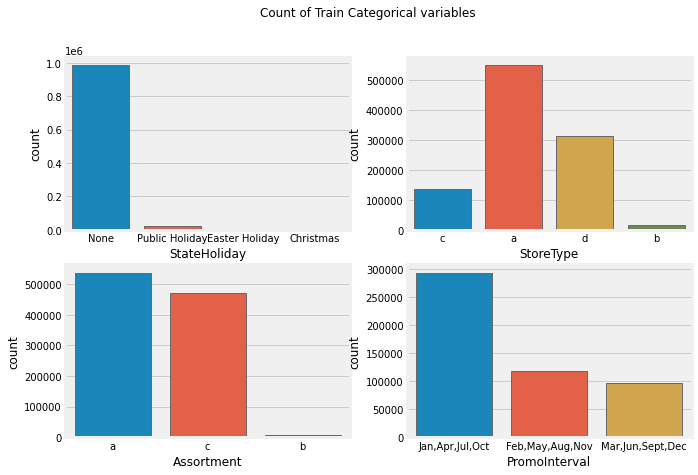

In [23]:
count_cat(train_df,cat_cols,'Count of Train Categorical variables')

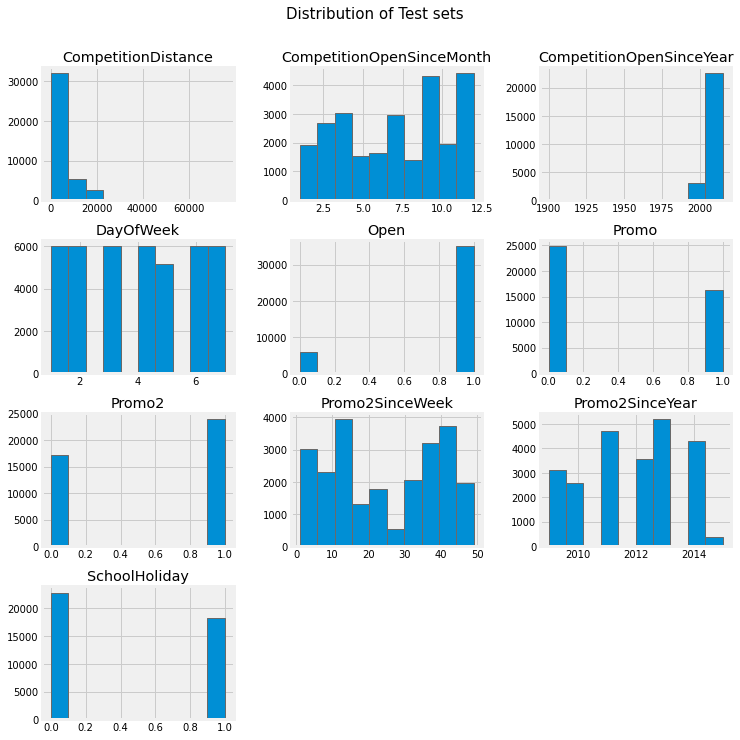

In [24]:
_=test_df[list(test_df.columns.difference(['Id','Store']))].hist(figsize=(11,12))
_=plt.suptitle('Distribution of Test sets',y=0.95,size=15)

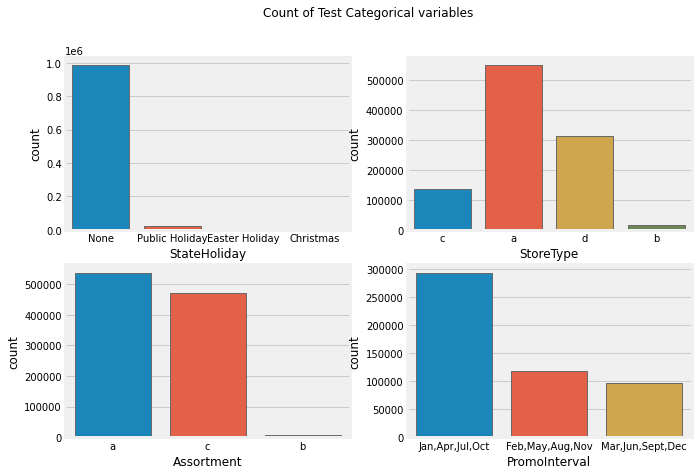

In [25]:
count_cat(test_df,cat_cols,'Count of Test Categorical variables')

#### Check and Remove outliers 

In [26]:
#Find the outliers

def outlier_bound(df,cols_use):
    bounds={}
    for col in cols_use:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [27]:
#Replace the outliers with median value This helps with the computational analysis.

def outlier_remove(df,cols_use):
    bounds=outlier_bound(df,cols_use)
    for col in cols_use:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].median()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [28]:
train_df=outlier_remove(train_df,['Sales','Customers'])

In [29]:
# train_df.to_csv('train.csv')
# test_df.to_csv('test.csv')

In [30]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str=None,rot=0,figsize:tuple=(8,5)) -> None:
    plt.figure(figsize=figsize)
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title)
    plt.xticks(fontsize=14,rotation=rot)
    plt.yticks(fontsize=14)
    plt.show()

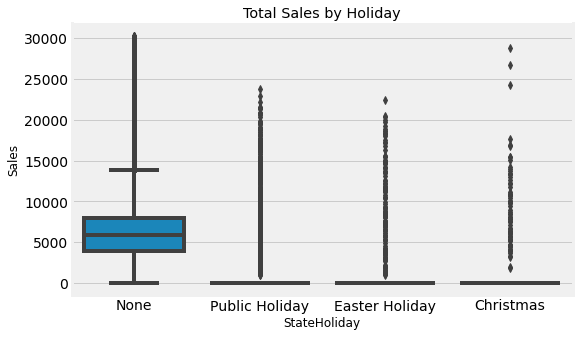

In [31]:
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
plot_box_multi(train_df,x_col='StateHoliday',y_col='Sales',title='Total Sales by Holiday')

**How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?**

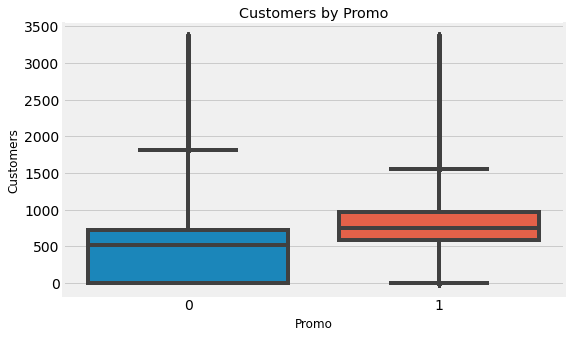

In [32]:
plot_box_multi(train_df,x_col='Promo',y_col='Customers',title='Customers by Promo')

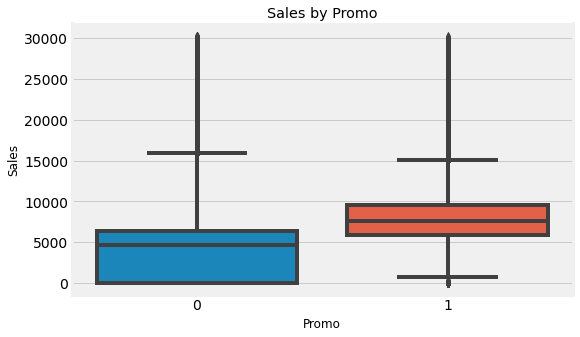

In [33]:
plot_box_multi(train_df,x_col='Promo',y_col='Sales',title='Sales by Promo')

In [34]:
tt=train_df.groupby(by=['Store','Promo'],as_index=False).agg({'DayOfWeek':lambda x:x.value_counts().index[0],
                                                           'Sales':'mean','Customers':'mean'})

Text(0.5, 1.0, 'Frequent days for promo')

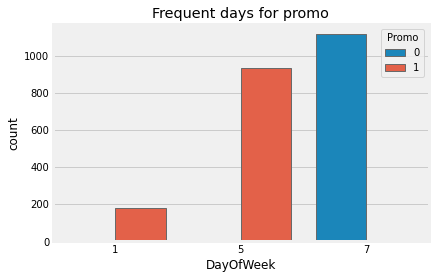

In [35]:
# tt.plot(kind='bar',x='DayOfWeek',y='Promo')
ax=sns.countplot(x='DayOfWeek',data=tt,hue='Promo')
ax.set_title('Frequent days for promo')

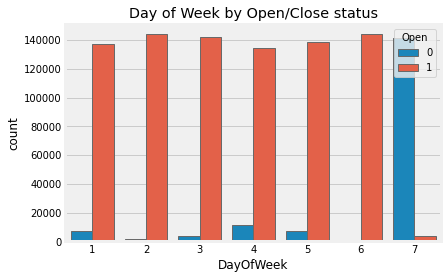

In [36]:
_=sns.countplot(data=train_df,x='DayOfWeek',hue='Open').set(title='Day of Week by Open/Close status')

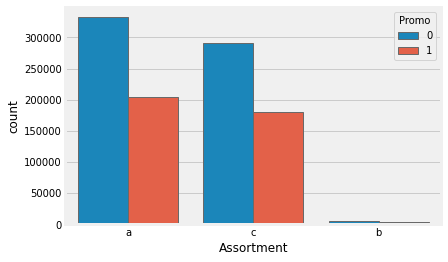

In [37]:
_=sns.countplot(x='Assortment',data=train_df,hue='Promo')

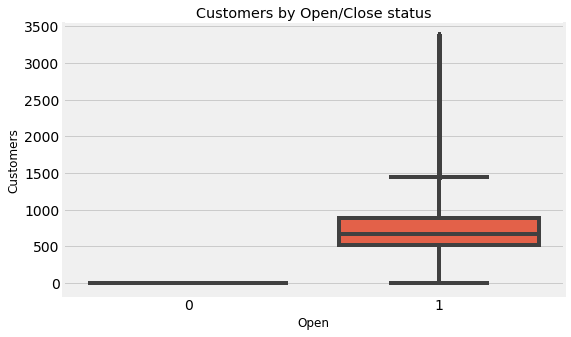

In [38]:
plot_box_multi(train_df,x_col='Open',y_col='Customers',title='Customers by Open/Close status')

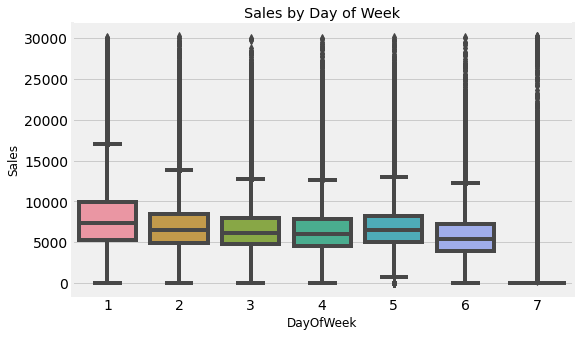

In [39]:
plot_box_multi(train_df,x_col='DayOfWeek',y_col='Sales',title='Sales by Day of Week')

In [40]:
train_grouped=train_df.groupby(by='Date').aggregate({'Sales':'sum','Customers':'sum','StateHoliday':'unique'})

In [41]:
train_grouped['StateHoliday']=train_grouped['StateHoliday'].apply(lambda x: x[0])

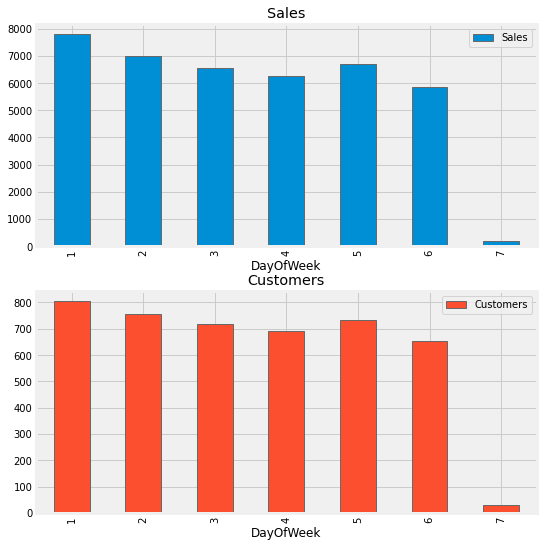

In [42]:
_=train_df.groupby(by='DayOfWeek').agg({'Sales':'mean','Customers':'mean'}).plot(kind='bar',
                                                                                 subplots=True,figsize=(8,9),sharex=False)

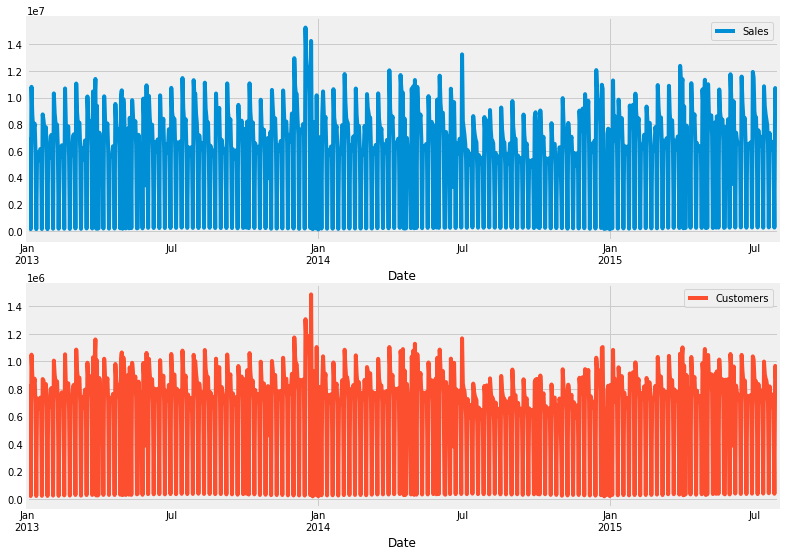

In [43]:
_=train_grouped[['Sales','Customers']].plot(subplots=True,figsize=(12,9),sharex=False)

In [44]:
public_holiday=train_grouped.query("StateHoliday=='Public Holiday'").index
xmas=train_grouped.query("StateHoliday=='Christmas'").index
easter=train_grouped.query("StateHoliday=='Easter Holiday'").index

In [45]:
#plot lines
def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

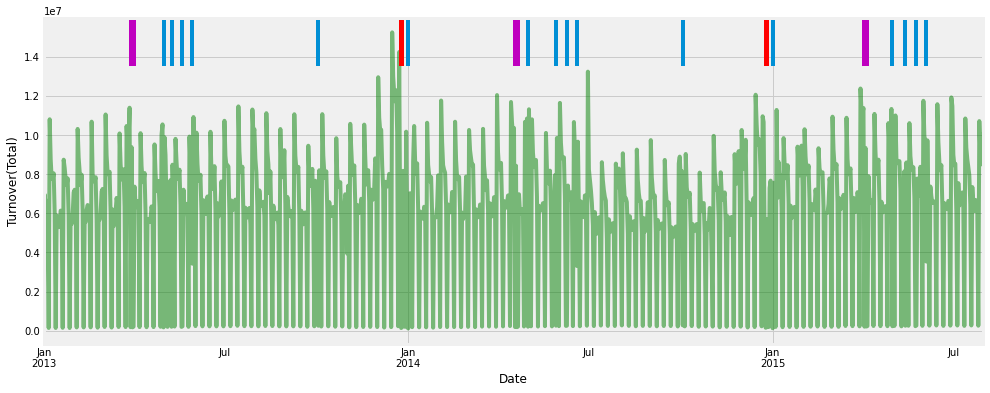

In [46]:
train_grouped['Sales'].plot(color='g',figsize=(15,6),alpha=0.5,ylabel='Turnover(Total)')
for i in public_holiday:
    plt.axvline(i,label='Public Holiday',ymin=0.85)

for i in easter:
    plt.axvline(i,color='m',label='Easter',ymin=0.85)

for i in xmas:
    plt.axvline(i,color='r',label='Christmas',ymin=0.85)

<AxesSubplot:xlabel='Date'>

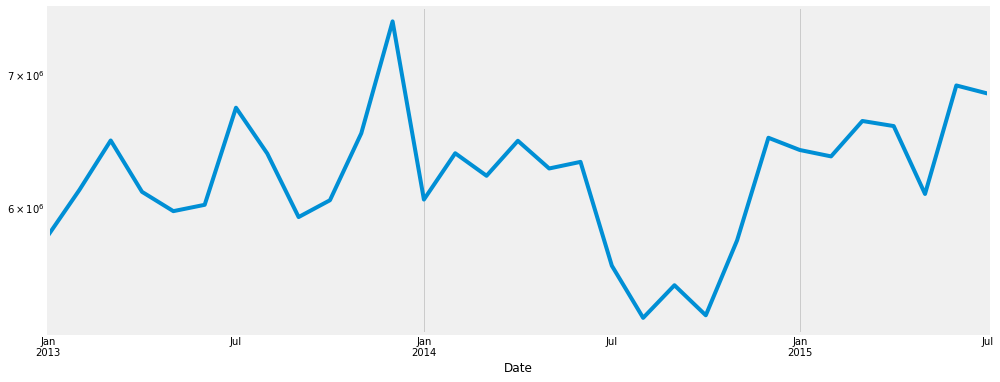

In [47]:
monthly=train_grouped['Sales'].resample('M').mean()
monthly.plot(figsize=(15,6),logy=True)

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf

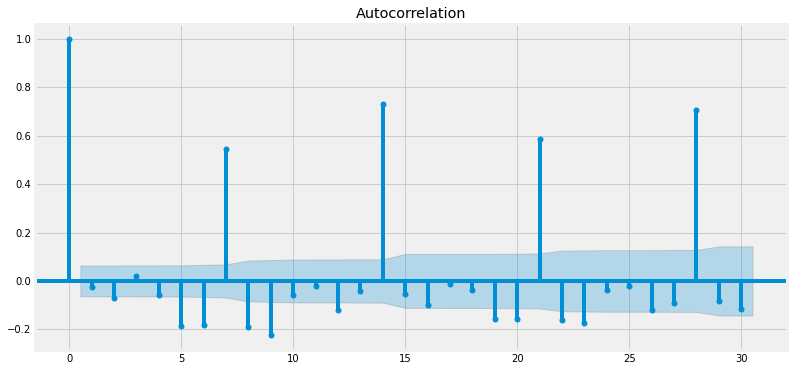

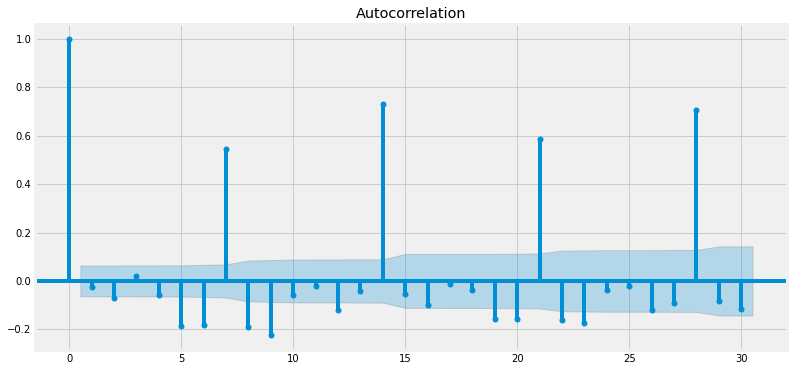

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(train_grouped['Sales'],lags=30,ax=ax)

In [50]:
mpl.rcParams['agg.path.chunksize'] = 10000

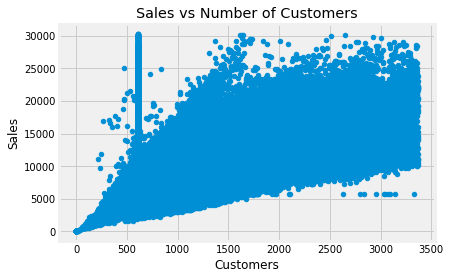

In [51]:
_=train_df.plot(kind='scatter',x='Customers',y='Sales',title='Sales vs Number of Customers')

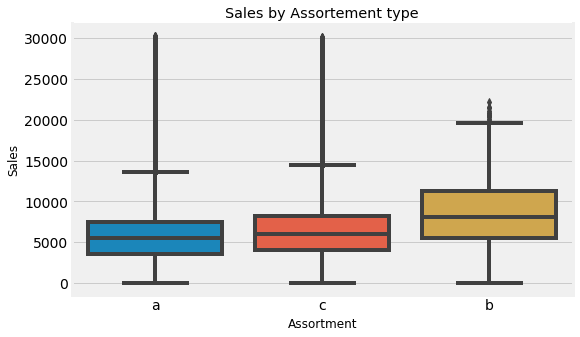

In [52]:
plot_box_multi(train_df,x_col='Assortment',y_col='Sales',title='Sales by Assortement type')

(0.0, 10000.0)

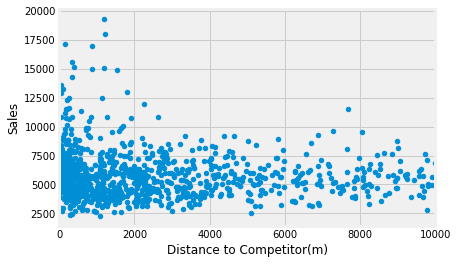

In [53]:
competitor_dist=train_df.groupby(by='Store').aggregate({'Sales':'mean','CompetitionDistance':'min'})
competitor_dist.plot(kind='scatter',x='CompetitionDistance',y='Sales')
plt.xlabel('Distance to Competitor(m)')
plt.xlim(0,10000)

In [54]:
open_grouped=train_df.groupby(by=["Store","DayOfWeek"]).aggregate({'Open':lambda x:x.value_counts().index[0],
                                                           'Sales':'mean','Customers':'mean'})

In [55]:
open_grouped.reset_index(level=1,inplace=True)

In [56]:
only_open=open_grouped.drop(open_grouped.query('Open==0').index)

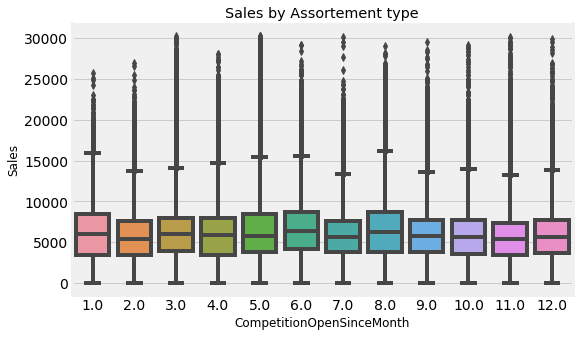

In [65]:
plot_box_multi(train_df,x_col='CompetitionOpenSinceMonth',y_col='Sales',title='Sales by Assortement type')

In [67]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [69]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
